In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
historical_data = pd.read_csv(r"C:\Users\navar\Downloads\historical_data.csv")

In [6]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
fear_greed_index = pd.read_csv(r"C:\Users\navar\Downloads\fear_greed_index.csv")

In [8]:
fear_greed_index.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
historical_data.shape

(211224, 16)

In [10]:
fear_greed_index.shape

(2644, 4)

In [11]:
print("\n missing values historical data:\n", historical_data.isnull().sum())
print("\n missing values fear greed:\n", fear_greed_index.isnull().sum())



 missing values historical data:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

 missing values fear greed:
 timestamp         0
value             0
classification    0
date              0
dtype: int64


In [12]:
historical_data['Timestamp'] = pd.to_datetime(historical_data['Timestamp'],unit='ms',errors='coerce')
historical_data['Date'] = historical_data['Timestamp'].dt.date

In [13]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27


In [14]:
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'],errors='coerce')
fear_greed_index['Date'] = fear_greed_index['date'].dt.date

In [15]:
fear_greed_index.head()

,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [19]:
historical_data.rename(columns={'Account':'account',
                               'Closed Pnl':'closedPnl',
                               'Side':'side',
                               'Size USD':'size_usd'},inplace=True)

In [20]:
historical_data.head()

,account,Coin,Execution Price,Size Tokens,size_usd,side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27


In [21]:
fear_greed_index.rename(columns={'classification':'Classification'},inplace=True)

In [22]:
fear_greed_index.head()

,timestamp,value,Classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [23]:
df = historical_data.merge(fear_greed_index[['Date','Classification']],on='Date',how='inner')

In [24]:
df.head()

,account,Coin,Execution Price,Size Tokens,size_usd,side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


In [25]:
df['Win'] = np.where(df['Closed PnL']> 0,1,0)

In [26]:
df.head()

,account,Coin,Execution Price,Size Tokens,size_usd,side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Classification,Win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed,0


In [33]:
daily_pnl = df.groupby(['account','Date'])['Closed PnL'].sum().reset_index()
print(daily_pnl)

                                       account        Date    Closed PnL
0   0x083384f897ee0f19899168e3b1bec365f52a9012  2024-10-27 -3.275059e+05
1   0x083384f897ee0f19899168e3b1bec365f52a9012  2025-02-19  1.927736e+06
2   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  2024-10-27  2.060745e+04
3   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  2025-02-19  1.709873e+04
4   0x271b280974205ca63b716753467d5a371de622ab  2024-07-03 -1.000000e+00
..                                         ...         ...           ...
72  0xbaaaf6571ab7d571043ff1e313a9609a10637864  2025-02-19  9.401572e+05
73  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  2024-10-27  1.167168e+04
74  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  2025-02-19  3.254420e+05
75  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  2024-10-27  6.842150e+05
76  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  2025-02-19  1.269680e+05

[77 rows x 3 columns]


In [35]:
win_rate = df.groupby('account')['Win'].mean().reset_index()

In [36]:
trades_per_day = df.groupby('Date').size().reset_index(name='trade_count')

In [37]:
long_short =df.groupby(['Date','side']).size().unstack().fillna(0)
if 'Buy' in long_short.columns and 'Sell' in long_short.columns:
    long_short['long_short_ratio'] = long_short['Buy'] / (long_short['Sell']+1)

In [40]:
performance_sentiment = df.groupby('Classification')['Closed PnL'].mean()
performance_sentiment

Classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64

In [41]:
winrate_sentiment = df.groupby('Classification')['Win'].mean()
winrate_sentiment

Classification
Extreme Greed    0.490089
Fear             0.415146
Greed            0.446471
Neutral          0.317182
Name: Win, dtype: float64

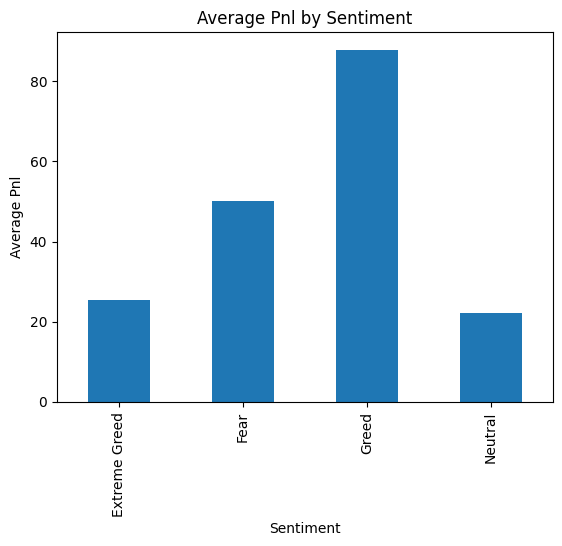

In [42]:
plt.figure()
performance_sentiment.plot(kind='bar')
plt.title("Average Pnl by Sentiment")
plt.xlabel('Sentiment')
plt.ylabel("Average Pnl")
plt.show()

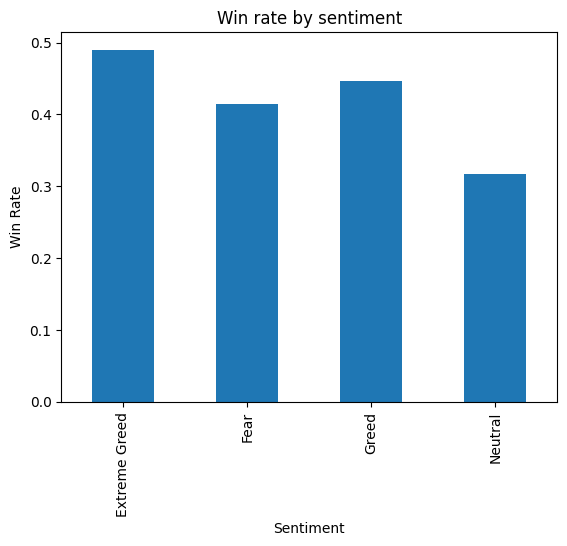

In [43]:
plt.figure()
winrate_sentiment.plot(kind='bar')
plt.title("Win rate by sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Win Rate")
plt.show()

In [44]:
average_tradesize = df.groupby('Classification')['size_usd'].mean()
trade_frequency = df.groupby('Classification').size()

In [45]:
print("\n average tradesize by sentiment:\n",average_tradesize)
print("\n trade frequency by sentiment:\n",trade_frequency)


 average tradesize by sentiment:
 Classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: size_usd, dtype: float64

 trade frequency by sentiment:
 Classification
Extreme Greed      6962
Fear             133871
Greed             36289
Neutral            7141
dtype: int64


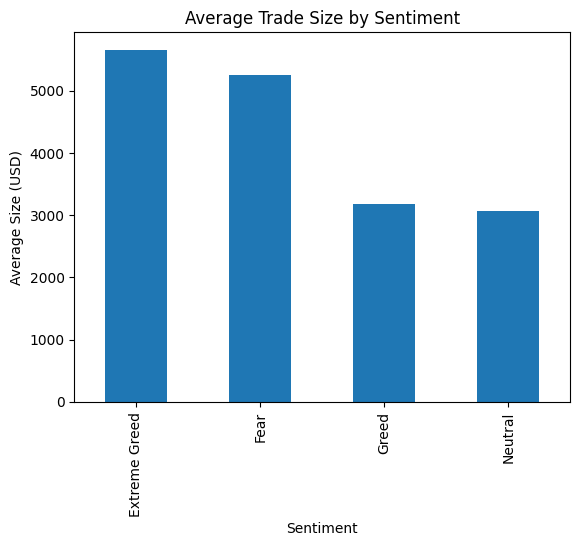

In [46]:
plt.figure()
average_tradesize.plot(kind='bar')
plt.title("Average Trade Size by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Size (USD)")
plt.show()

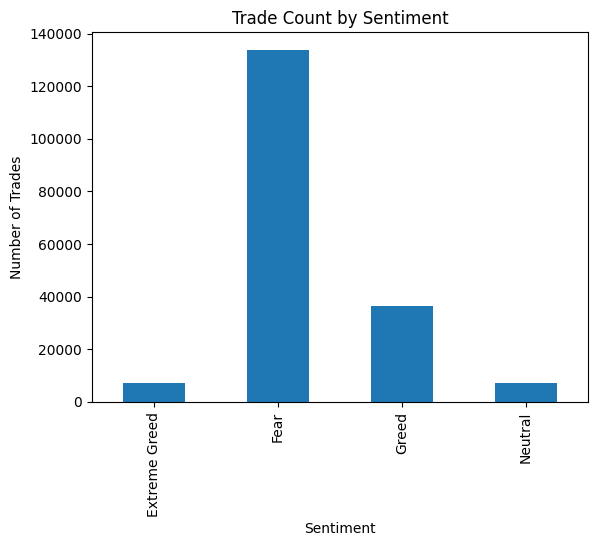

In [47]:
plt.figure()
trade_frequency.plot(kind='bar')
plt.title("Trade Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.show()

## High vs Low Volume Traders

In [48]:
total_volume = df.groupby('account')['size_usd'].sum()
median_volume = total_volume.median()

In [51]:
df['volume_segment'] = df['account'].map(lambda x:"High Volume" if total_volume[x] > median_volume else "Low Volume")

In [52]:
segment_performance = df.groupby(['volume_segment','Classification'])['Closed PnL'].mean().unstack()

In [53]:
print("\nSegment Performance:\n", segment_performance)


Segment Performance:
 Classification  Extreme Greed       Fear       Greed    Neutral
volume_segment                                                 
High Volume         26.658319  54.451470  114.308170  12.350266
Low Volume         -48.382749  35.421531   49.178549  29.236127


<Figure size 640x480 with 0 Axes>

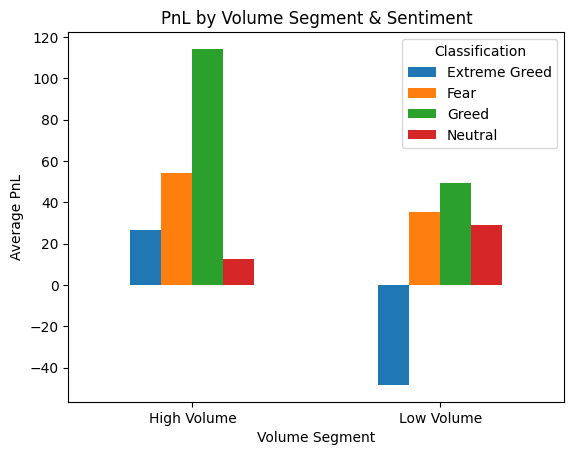

In [54]:
plt.figure()
segment_performance.plot(kind='bar')
plt.title("PnL by Volume Segment & Sentiment")
plt.xlabel("Volume Segment")
plt.ylabel("Average PnL")
plt.xticks(rotation=0)
plt.show()

## Consistent Winners

In [55]:
total_pnl = df.groupby('account')['Closed PnL'].sum()
winning_accounts = total_pnl[total_pnl>0].index

In [56]:
df['consistency'] = df['account'].apply(
    lambda x: "Consistent Winner" if x in winning_accounts else "Inconsistent")

In [58]:
consistency_perf = df.groupby(['consistency', 'Classification'])['Closed PnL'].mean().unstack()

In [59]:
print("\nConsistency Performance:\n", consistency_perf)


Consistency Performance:
 Classification     Extreme Greed        Fear       Greed    Neutral
consistency                                                        
Consistent Winner      26.320044   50.622930   87.262599  22.451016
Inconsistent         -206.074672 -170.056381  229.772491   2.696935


<Figure size 640x480 with 0 Axes>

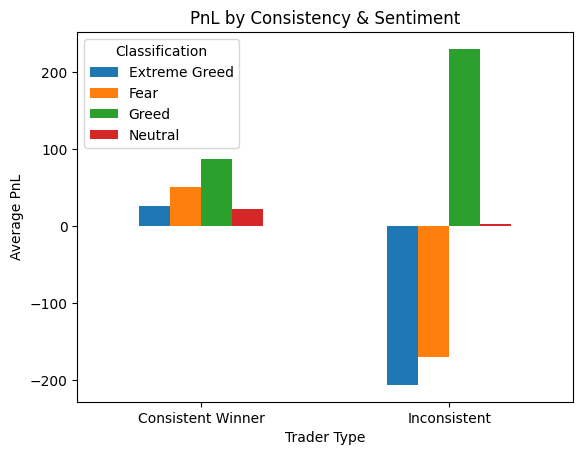

In [60]:
plt.figure()
consistency_perf.plot(kind='bar')
plt.title("PnL by Consistency & Sentiment")
plt.xlabel("Trader Type")
plt.ylabel("Average PnL")
plt.xticks(rotation=0)
plt.show()

# Insights

#### The most profitable days are the ones filled with greed.

#### The profitability of fear days is average.

#### The weakest days are neutral ones.

#### Extreme greed suggests smaller gains per win but increases win rate without affecting profitability.
#### When there is extreme greed and fear, traders take bigger positions.
#### Fear is the time most trading occurs.
#### This implies , When there is uncertainty, traders respond more aggressively. Perhaps panicked trading

# Segment 1: High Volume vs Low Volume Traders


#### During Greed, high-volume traders perform significantly better.

#### During Extreme Greed, low-volume traders suffer significant losses.

#### In most regimes, high-volume traders continue to make money.

#### Shows that experience and capital scale are important.

# Segment 2: Consistent Winners vs Inconsistent Traders

#### Across all sentiment regimes, consistent winners continue to make money.
#### inconsistent traders Lose a lot of fear
#### Extreme Greed is a huge loss.
#### Do well only in Greed. 

### strong insights we get to know
## Greed Is the Most Profitable Regime
## Fear Increases Activity But Not Win Rate
## Inconsistent Traders Suffer in Extreme Sentiment

# Actionable output

## Strategy 1: Sentiment-Based Exposure Control

## Strategy 2: Trader Segmentation Strategy